In [18]:
from monte_carlo_ar1 import (generate_staggered_law_ar1_data)

In [4]:
import pandas as pd
import statsmodels.formula.api as sm
from wildboottest.wildboottest import wildboottest

In [19]:
data = generate_staggered_law_ar1_data(50,20, 0.8, 10)

In [10]:
data.columns

Index(['state', 'individual', 'time', 'value', 'state_2', 'state_3', 'state_4',
       'state_5', 'state_6', 'state_7', 'state_8', 'state_9', 'state_10',
       'state_11', 'state_12', 'state_13', 'state_14', 'state_15', 'state_16',
       'state_17', 'state_18', 'state_19', 'state_20', 'state_21', 'state_22',
       'state_23', 'state_24', 'state_25', 'state_26', 'state_27', 'state_28',
       'state_29', 'state_30', 'state_31', 'state_32', 'state_33', 'state_34',
       'state_35', 'state_36', 'state_37', 'state_38', 'state_39', 'state_40',
       'state_41', 'state_42', 'state_43', 'state_44', 'state_45', 'state_46',
       'state_47', 'state_48', 'state_49', 'state_50', 'time_1', 'time_2',
       'time_3', 'time_4', 'time_5', 'time_6', 'time_7', 'time_8', 'time_9',
       'time_10', 'time_11', 'time_12', 'time_13', 'time_14', 'time_15',
       'time_16', 'time_17', 'time_18', 'time_19', 'TREATMENT'],
      dtype='object')

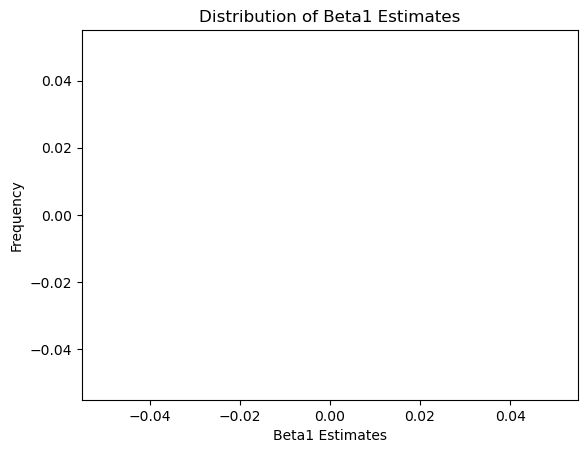

c:\Users\Biswajit Palit\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Biswajit Palit\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\Biswajit Palit\anaconda3\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


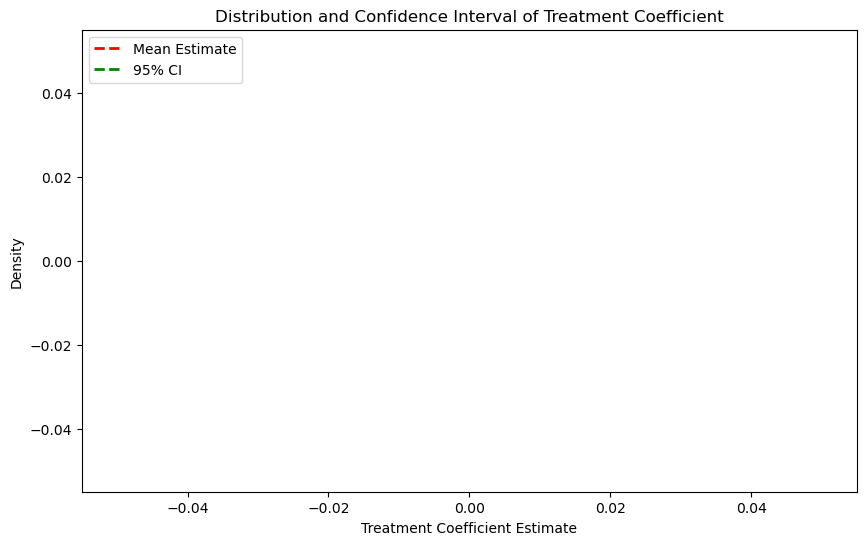

Number of times null hypothesis is rejected for: 56 out of 1000 simulations
Type 1 Error: 0.056
Bias for Coefficient of Treatment (True Value = 0): -0.000860076828043574
Average MSE for Coefficient of Treatment (True Value = 0): 0.0014284335442100676
Average Standard Error for Coefficient of Treatment: 0.037260691400195625
Standard Error of the Distribution of Beta: 0.037784835742132455


In [21]:
import pandas as pd
import statsmodels.formula.api as sm
from wildboottest.wildboottest import wildboottest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

beta1_estimates = []
reject_count = 0  # Counter for the number of rejections
alpha = 0.05  # Significance level
num_simulations = 1000
num_individuals = 20
bias_values = []
squared_error_values = []
standard_error_values = []  # List to store standard errors
N = 50
T = 20
rho = 0
true_beta1_value = 0
estimated_effects = []

for _ in range(1000):   
    data = generate_staggered_law_ar1_data(50, 20, 0, 10)
    model = sm.ols(formula="value ~ TREATMENT + 1 + state_2 + state_3 + state_4 + state_5 + state_6 + state_7 + state_8 + state_9 + state_10 + state_11 + state_12 + state_13 + state_14 + state_15 + state_16 + state_17 + state_18 + state_19 + state_20 + state_21 + state_22 + state_23 + state_24 + state_25 + state_26 + state_27 + state_28 + state_29 + state_30 + state_31 + state_32 + state_33 + state_34 + state_35 + state_36 + state_37 + state_38 + state_39 + state_40 + state_41 + state_42 + state_43 + state_44 + state_45 + state_46 + state_47 + state_48 + state_49 + state_50 + time_1 + time_2 + time_3 + time_4 + time_5 + time_6 + time_7 + time_8 + time_9 + time_10 + time_11 + time_12 + time_13 + time_14 + time_15 + time_16 + time_17 + time_18 + time_19", data=data)
    result = model.fit()
    wildboottest_results = wildboottest(model, param="TREATMENT", cluster=data['state'], B=1000, bootstrap_type='11', show = False)
    wildboottest_results = pd.DataFrame(wildboottest_results)
    p_value = wildboottest_results['p-value'].iloc[0]

    if p_value < 0.05:
        reject_count += 1

    # Store the estimated treatment effect
    estimated_effects.append(result.params['TREATMENT'])
    # Calculate bias
    true_treatment_effect = 0
    bias = np.mean(estimated_effects) - true_treatment_effect
    squared_error = (result.params['TREATMENT'] - true_beta1_value) ** 2
    squared_error_values.append(squared_error)
    # Extract the standard error of the 'Treatment' coefficient
    standard_error = result.bse['TREATMENT']
    standard_error_values.append(standard_error)

# Calculate distribution of the estimator
estimator_distribution = np.array(estimated_effects)

type1_error = reject_count/1000
average_bias = np.mean(bias)
average_mse = np.mean(squared_error_values)
average_standard_error = np.mean(standard_error_values)

# Calculate the standard error of the distribution of beta
std_error_beta_distribution = np.std(estimator_distribution)

sns.histplot(beta1_estimates, kde=True)
plt.xlabel('Beta1 Estimates')
plt.ylabel('Frequency')
plt.title('Distribution of Beta1 Estimates')
plt.show()

# Calculate the confidence interval
confidence_interval = (
    np.mean(beta1_estimates) - 1.96 * std_error_beta_distribution,
    np.mean(beta1_estimates) + 1.96 * std_error_beta_distribution
)

# Plot the confidence interval
plt.figure(figsize=(10, 6))
plt.hist(beta1_estimates, bins=30, density=True, color='blue', alpha=0.7)
plt.axvline(np.mean(beta1_estimates), color='red', linestyle='dashed', linewidth=2, label='Mean Estimate')
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label='95% CI')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Treatment Coefficient Estimate')
plt.ylabel('Density')
plt.title('Distribution and Confidence Interval of Treatment Coefficient')
plt.legend()
plt.show()

# Print the results
print(f"Number of times null hypothesis is rejected for: {reject_count} out of {num_simulations} simulations")
print(f"Type 1 Error: {type1_error}")
print(f"Bias for Coefficient of Treatment (True Value = {true_beta1_value}): {average_bias}")
print(f"Average MSE for Coefficient of Treatment (True Value = {true_beta1_value}): {average_mse}")
print(f"Average Standard Error for Coefficient of Treatment: {average_standard_error}")
print(f"Standard Error of the Distribution of Beta: {std_error_beta_distribution}")


In [23]:
import pandas as pd
import statsmodels.formula.api as sm
from wildboottest.wildboottest import wildboottest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

np.random.seed(42)


def beta_Ztest_twosided(n, alpha, sigma, mu_0, mu):
    # (1-alpha/2)-quantile of N(0,1):
    z_upper = stats.norm.ppf(1 - alpha/2)
    
    # location shift under H_1:
    location_shift = np.sqrt(n) * (mu - mu_0) / sigma
    
    # compute power
    power = 1 - stats.norm.cdf(z_upper - location_shift)
    
    return power


beta1_estimates = []
reject_count = 0  # Counter for the number of rejections
alpha = 0.05  # Significance level
num_simulations = 1000
num_individuals = 20
bias_values = []
squared_error_values = []
standard_error_values = []  # List to store standard errors
N = 50
T = 20
rho = 0
true_beta1_value = 0
estimated_effects = []
power_values = []

for _ in range(400):   
    data = generate_staggered_law_ar1_data(50, 20, 0, 100)
    model = sm.ols(formula="value ~ TREATMENT + 1 + state_2 + state_3 + state_4 + state_5 + state_6 + state_7 + state_8 + state_9 + state_10 + state_11 + state_12 + state_13 + state_14 + state_15 + state_16 + state_17 + state_18 + state_19 + state_20 + state_21 + state_22 + state_23 + state_24 + state_25 + state_26 + state_27 + state_28 + state_29 + state_30 + state_31 + state_32 + state_33 + state_34 + state_35 + state_36 + state_37 + state_38 + state_39 + state_40 + state_41 + state_42 + state_43 + state_44 + state_45 + state_46 + state_47 + state_48 + state_49 + state_50 + time_1 + time_2 + time_3 + time_4 + time_5 + time_6 + time_7 + time_8 + time_9 + time_10 + time_11 + time_12 + time_13 + time_14 + time_15 + time_16 + time_17 + time_18 + time_19", data=data)
    result = model.fit()
    wildboottest_results = wildboottest(model, param="TREATMENT", cluster=data['state'], B=1000, bootstrap_type='11', show = False)
    wildboottest_results = pd.DataFrame(wildboottest_results)
    p_value = wildboottest_results['p-value'].iloc[0]

    if p_value < 0.05:
        reject_count += 1
    
    power = beta_Ztest_twosided(N, alpha, standard_error, true_beta1_value, result.params['TREATMENT'])
    power_values.append(power)

average_power = np.mean(power_values)
print(f"Average Power: {average_power}")


Average Power: 0.37395956361572275
